## Linear Regression

In [1]:
import pandas as pd
import numpy as  np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn import linear_model
from sklearn.metrics import max_error
from sklearn.metrics import mean_absolute_error, mean_squared_error, median_absolute_error, mean_squared_log_error, r2_score

In [2]:
data = {
    'mesin x' : [1000, 2000, 3000, 4000, 5000],
    'harga y' : [10, 25, 35, 55, 80]
}
df = pd.DataFrame(data)
df

,mesin x,harga y
0,1000,10
1,2000,25
2,3000,35
3,4000,55
4,5000,80


In [3]:
model = linear_model.LinearRegression()
model.fit(df[['mesin x']],df['harga y'])
# plt.plot(df['mesin'],df['harga'],'ro-')
df['hargaPrediksi'] = model.predict(df[['mesin x']])
df

,mesin x,harga y,hargaPrediksi
0,1000,10,7.0
1,2000,25,24.0
2,3000,35,41.0
3,4000,55,58.0
4,5000,80,75.0


In [4]:
df['x^2'] = df['mesin x'] ** 2
df['y^2'] = df['harga y'] ** 2
df['xy']  = df['mesin x'] * df['harga y']
df

,mesin x,harga y,hargaPrediksi,x^2,y^2,xy
0,1000,10,7.0,1000000,100,10000
1,2000,25,24.0,4000000,625,50000
2,3000,35,41.0,9000000,1225,105000
3,4000,55,58.0,16000000,3025,220000
4,5000,80,75.0,25000000,6400,400000


Gradient/slope:    $\displaystyle m = \frac {n(\sum xy) - (\sum x)(\sum y)} {n(\sum x^2) - (\sum x)^2}$

In [5]:
m = ((df['xy'].count() * df['xy'].sum()) - (df['mesin x'].sum() * df['harga y'].sum())) / ((df['xy'].count() * df['x^2'].sum()) - (df['mesin x'].sum() ** 2))
m

0.017

intercept $\displaystyle c = \frac {(\sum y)(\sum x ^2) - (\sum x)(\sum xy)}{n(\sum x^2) - (\sum x)^2}$

In [6]:
c = ((df['harga y'].sum() * df['x^2'].sum())-(df['mesin x'].sum() * df['xy'].sum())) / ((df['mesin x'].count() * df['x^2'].sum()) - (df['mesin x'].sum() ** 2))
c

-10.0

Prediction  $\displaystyle \hat{y} = mx + c$

In [7]:
yhat = m * df['mesin x'] + c
df ["y'"] = yhat
df

,mesin x,harga y,hargaPrediksi,x^2,y^2,xy,y'
0,1000,10,7.0,1000000,100,10000,7.0
1,2000,25,24.0,4000000,625,50000,24.0
2,3000,35,41.0,9000000,1225,105000,41.0
3,4000,55,58.0,16000000,3025,220000,58.0
4,5000,80,75.0,25000000,6400,400000,75.0


### Multivariate Linear regression

- Simple linear regression multiple variable

$$\hat{y} = m_0 x_0 + m_1 x_1 + m_2 x_2 +...+c$$

In [8]:
data2 = {
    'mesin x1' : [112,250,360,450,600],
    'usia x2' : [5,3,3,1,1],
    'km x3' : [8,7,7,5,4],
    'harga y' : [100, 200, 300, 400, 500]
}
df2 = pd.DataFrame(data2)
df2.corr()


,mesin x1,usia x2,km x3,harga y
mesin x1,1.000000,-0.934973,-0.954740,0.996942
usia x2,-0.934973,1.000000,0.945611,-0.944911
km x3,-0.954740,0.945611,1.000000,-0.962250
harga y,0.996942,-0.944911,-0.962250,1.000000


In [9]:
model = linear_model.LinearRegression()
model.fit(df2[['mesin x1', 'usia x2', 'km x3']], df2['harga y'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [21]:
m = (model.coef_)
c = (model.intercept_)
m

array([ 0.72827725, -6.57960824, -7.33299849])

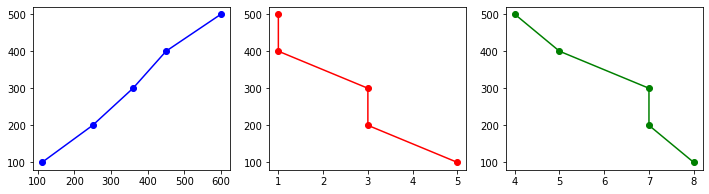

In [11]:
plt.figure(figsize=(12,3))
plt.subplot(131)
plt.plot(df2['mesin x1'], df2['harga y'], 'bo-')
plt.subplot(132)
plt.plot(df2['usia x2'], df2['harga y'], 'ro-')
plt.subplot(133)
plt.plot(df2['km x3'], df2['harga y'], 'go-')


In [12]:
df2

,mesin x1,usia x2,km x3,harga y
0,112,5,8,100
1,250,3,7,200
2,360,3,7,300
3,450,1,5,400
4,600,1,4,500


In [13]:
# mesin ,usia, km
model.predict([[112,5,8]])[0]

94.47513812154695

In [14]:
df2['y_pred'] = model.predict(df2[['mesin x1', 'usia x2', 'km x3']])

df2

,mesin x1,usia x2,km x3,harga y,y_pred
0,112,5,8,100,94.475138
1,250,3,7,200,215.469613
2,360,3,7,300,295.580110
3,450,1,5,400,388.950276
4,600,1,4,500,505.524862


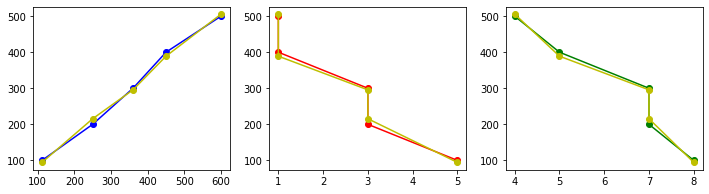

In [15]:
plt.figure(figsize=(12,3))
plt.subplot(131)
plt.plot(df2['mesin x1'], df2['harga y'], 'bo-')
plt.plot(df2['mesin x1'], df2['y_pred'], 'yo-')

plt.subplot(132)
plt.plot(df2['usia x2'], df2['harga y'], 'ro-')
plt.plot(df2['usia x2'], df2['y_pred'], 'yo-')

plt.subplot(133)
plt.plot(df2['km x3'], df2['harga y'], 'go-')
plt.plot(df2['km x3'], df2['y_pred'], 'yo-')




In [22]:
df2["y'x1"] = m[0] * df2['mesin x1'] + c
df2["y'x2"] = m[1] * df2['usia x2'] + c
df2["y'x3"] = m[2] * df2['km x3'] + c

df2 


,mesin x1,usia x2,km x3,harga y,y_pred,y'x1,y'x2,y'x3
0,112,5,8,100,94.475138,186.037167,71.572074,45.806128
1,250,3,7,200,215.469613,286.539427,84.731291,53.139126
2,360,3,7,300,295.580110,366.649925,84.731291,53.139126
3,450,1,5,400,388.950276,432.194877,97.890507,67.805123
4,600,1,4,500,505.524862,541.436464,97.890507,75.138122


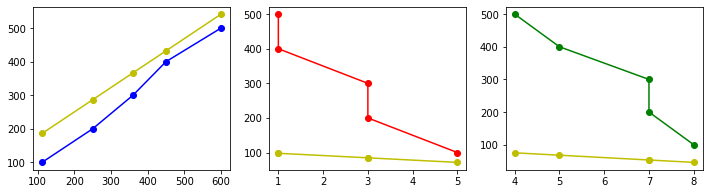

In [23]:
plt.figure(figsize=(12,3))
plt.subplot(131)
plt.plot(df2['mesin x1'], df2['harga y'], 'bo-')
plt.plot(df2['mesin x1'], df2["y'x1"], 'yo-')

plt.subplot(132)
plt.plot(df2['usia x2'], df2['harga y'], 'ro-')
plt.plot(df2['usia x2'], df2["y'x2"], 'yo-')

plt.subplot(133)
plt.plot(df2['km x3'], df2['harga y'], 'go-')
plt.plot(df2['km x3'], df2["y'x3"], 'yo-')


### Evaluation Metrics

In [26]:

print("MAE:",round(mean_absolute_error(df2['harga y'],df2['y_pred']),2))
print("MSE:",round(mean_squared_error(df2['harga y'],df2['y_pred']),2))
print("RMSE:",np.sqrt(round(mean_squared_error(df2['harga y'],df2['y_pred']),2)))
print("MedAe:",round(median_absolute_error(df2['harga y'],df2['y_pred']),2))
print("MSLE:",round(mean_squared_log_error(df2['harga y'],df2['y_pred']),2))
print("RMSLE:",np.sqrt(round(mean_squared_log_error(df2['harga y'],df2['y_pred']),2)))
print("R2 Score:",(r2_score(df2['harga y'],df2['y_pred'])))


MAE: 8.4
MSE: 88.4
RMSE: 9.402127418834526
MedAe: 5.52
MSLE: 0.0
RMSLE: 0.0
R2 Score: 0.9955801104972376
